# Housing Sales x Population & Income Analysis

- Name: Liam Durkan <br>
- Student Number: C00264405

## Table of Contents: 
1. [Dataset Cleaning](#dataset-cleaning)
2. [Preprocessing](#contact-information)
3. [Visiualisation](#technical-skills)

Prerequsites: 
- install opendatasets
- install pandas 

In [1]:
#Required imports
import opendatasets as od
import pandas as pd
#import requests
import csv
from statistics import mode, median

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Cleaning

## Dataset 1: Property Price Register Ireland
- This dataset is a collection of house sales in ireland from 2010 - 2021<br><br>
- Downloading Data from Kaggle.com and store in a dataframe to be cleaned.

In [2]:
od.download("https://www.kaggle.com/datasets/erinkhoo/property-price-register-ireland/data") #download dataset from kaggle 

propertyPrice_df = pd.read_csv('property-price-register-ireland/Property_Price_Register_Ireland-28-05-2021.csv') #store dataset in a data frame. 
propertyPrice_df #display data frame

Skipping, found downloaded files in "./property-price-register-ireland" (use force=True to force download)


,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",NaN,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
476740,2021-05-28,"GRANGE STORES, GRANGE, MULLINGAR",NaN,Westmeath,150000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476741,2021-05-28,"MAIN STREET, LOWER BORRIS, BORRIS",NaN,Carlow,170000.0,1,0,Second-Hand Dwelling house /Apartment,NaN
476742,2021-05-28,"MULTYFARNHAM, WESTMEATH",NaN,Westmeath,175000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476743,2021-05-28,"NO 2 RIVERLODGE, SHRONE, GLENGARIFF",NaN,Cork,240000.0,0,0,Second-Hand Dwelling house /Apartment,NaN


Begin cleaning data set by dropping unrequired columns

In [3]:
propertyPrice_df.drop(columns=["ADDRESS", "POSTAL_CODE", "IF_MARKET_PRICE", "PROPERTY_SIZE_DESC" ], inplace=True) #drop columns and store in current data frame 

In [4]:
propertyPrice_df = propertyPrice_df.dropna() #drop any rows that contain null values
rows_dropped = len(propertyPrice_df) - len(propertyPrice_df.dropna())
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 0


Rename columns 

In [5]:
propertyPrice_df.rename(columns = {
    'SALE_DATE':'YEAR',
    'SALE_PRICE':'SALE PRICE',
    'IF_VAT_EXCLUDED':'VAT EXCLUDED',
    'PROPERTY_DESC': 'NEW BUILD' 
}, inplace = True) #rename columns and store in current data frame

In this data set, there are new and old houses.
VAT of 13.5% is applied to houses where VAT is excluded from the sales prices to standardise prices 

In [6]:
newPropertyPrice_df = propertyPrice_df.copy(deep=True) #create a copy to avoid modifying the original 
newPropertyPrice_df.loc[propertyPrice_df['VAT EXCLUDED'] == 1, 'SALE PRICE'] *= 1.135 

newPropertyPrice_df.drop(columns=["VAT EXCLUDED"], inplace=True) #drop VAT column and store in current data frame

Convert stings to boolean values 

In [7]:
newPropertyPrice_df.loc[newPropertyPrice_df['NEW BUILD'] == 'New Dwelling house /Apartment', 'NEW BUILD'] = '1'
newPropertyPrice_df.loc[newPropertyPrice_df['NEW BUILD'] == 'Second-Hand Dwelling house /Apartment', 'NEW BUILD'] = '0'

In [8]:
newPropertyPrice_df['YEAR'] = newPropertyPrice_df['YEAR'].str[:4] #Keep the year only of the date
newPropertyPrice_df

,YEAR,COUNTY,SALE PRICE,NEW BUILD
0,2010,Dublin,343000.0,0
1,2010,Laois,209975.0,1
2,2010,Dublin,438500.0,0
3,2010,Meath,400000.0,0
4,2010,Kilkenny,160000.0,0
...,...,...,...,...
476740,2021,Westmeath,150000.0,0
476741,2021,Carlow,170000.0,0
476742,2021,Westmeath,175000.0,0
476743,2021,Cork,240000.0,0


## Dataset 2: Ireland's Population 
Download dataset from www.cso.ie 

In [9]:
population_df = pd.read_csv('./census-population/F3001.20231026T151057.csv') #store dataset in a data frame. 
population_df #display raw data frame

,Statistic Label,Census Year,County and City,Detailed Marital Status,Sex,UNIT,VALUE
0,Population,2011,State,All marital status,Both sexes,Number,4588252
1,Population,2011,State,All marital status,Male,Number,2272699
2,Population,2011,State,All marital status,Female,Number,2315553
3,Population,2011,State,Single,Both sexes,Number,2484625
4,Population,2011,State,Single,Male,Number,1285612
...,...,...,...,...,...,...,...
2227,Population,2022,Monaghan,Divorced,Male,Number,646
2228,Population,2022,Monaghan,Divorced,Female,Number,975
2229,Population,2022,Monaghan,Widowed,Both sexes,Number,2921
2230,Population,2022,Monaghan,Widowed,Male,Number,763


Begin cleaning data set

In [10]:
population_df.drop(columns=['UNIT'], inplace=True) #drop columns and store in current data frame

In [11]:
population_df = population_df.dropna() #drop any rows that contain null values
rows_dropped = len(population_df) - len(population_df.dropna())#lenght of the dataframe minus dropped dataframe
print(f"Number of rows dropped: {rows_dropped}")
population_df

Number of rows dropped: 0


,Statistic Label,Census Year,County and City,Detailed Marital Status,Sex,VALUE
0,Population,2011,State,All marital status,Both sexes,4588252
1,Population,2011,State,All marital status,Male,2272699
2,Population,2011,State,All marital status,Female,2315553
3,Population,2011,State,Single,Both sexes,2484625
4,Population,2011,State,Single,Male,1285612
...,...,...,...,...,...,...
2227,Population,2022,Monaghan,Divorced,Male,646
2228,Population,2022,Monaghan,Divorced,Female,975
2229,Population,2022,Monaghan,Widowed,Both sexes,2921
2230,Population,2022,Monaghan,Widowed,Male,763


In [12]:
population_df = population_df[population_df['Sex'] == 'Both sexes'] #only include rows with both sexes
population_df = population_df[population_df['Detailed Marital Status'] == 'All marital status']
population_df = population_df[population_df['County and City'] != 'State'] #drop state (country summary) rows 
population_df.drop(columns=['Detailed Marital Status','Sex'], inplace=True) #drop columns and store in current data frame

In [47]:
population_df.rename(columns={'County and City': 'County'}, inplace = True) #rename columns and store in a new dataframe 

uniqueCounties = population_df['County'].unique()# get a dataframe of all unique county names

population_df['County'] = population_df['County'].replace(
    {
        'South Dublin': 'Dublin',
        'Dún Laoghaire-Rathdown': 'Dublin',
        'Fingal': 'Dublin',
        'Cork City and Cork County':'Cork',
        ' City': '',
        ' County' : '',
        ' City and County' : '',
        ' and': ''
    }, regex=True) #preform multiple replacements 


Group by county and year, summing the values 

In [48]:
newPopulation_df = population_df.groupby(['Census Year', 'County'])['VALUE'].sum().reset_index()
newPopulation_df

,Census Year,County,VALUE
0,2011,Carlow,54612
1,2011,Cavan,73183
2,2011,Clare,117196
3,2011,Cork,519032
4,2011,Donegal,161137
...,...,...,...
73,2022,Tipperary,167895
74,2022,Waterford,127363
75,2022,Westmeath,96221
76,2022,Wexford,163919


##  Dataset 3: Annual Household income


In [15]:
income_df = pd.read_csv('./household-income/NEA08.20231026T181049.csv') #store dataset in a data frame. 
income_df #display raw data frame

,Statistic Label,Year,County,Sex,UNIT,VALUE
0,Mean Annual Earnings,2011,All counties (1),Both sexes,Euro,39594
1,Mean Annual Earnings,2011,All counties (1),Male,Euro,45781
2,Mean Annual Earnings,2011,All counties (1),Female,Euro,33733
3,Mean Annual Earnings,2011,Carlow,Both sexes,Euro,34815
4,Mean Annual Earnings,2011,Carlow,Male,Euro,38715
...,...,...,...,...,...,...
1939,Median Annual Earnings,2022,Donegal,Male,Euro,34688
1940,Median Annual Earnings,2022,Donegal,Female,Euro,32059
1941,Median Annual Earnings,2022,Monaghan,Both sexes,Euro,34707
1942,Median Annual Earnings,2022,Monaghan,Male,Euro,36401


Begin cleaning dataset

In [16]:
income_df.drop(columns=["UNIT"], inplace=True) #drop columns and store in current data frame

Drop rows

In [17]:
income_df = income_df.dropna() #drop any rows that contain null values
rows_dropped = len(income_df) - len(income_df.dropna())
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 0


In [18]:
income_df = income_df[income_df['Sex'] == 'Both sexes']# Only keep both sexes rows
income_df.drop(columns=['Sex'], inplace=True) #drop columns and store in current data frame
income_df = income_df[income_df['County'] != 'All counties (1)'] #drop all counties rows 

## Data Processing & Visualization <br>
The mean, mode and median are all measures of central tendency:
- The mean is the average of all numbers 
- The median is the middle number
- The mode is the most common number

###  Data Set 1: Property Price Register Ireland <br>

##### Step 1: Calculate the mean for each individual county

In [19]:
meanPropertyPrice = newPropertyPrice_df.groupby(['COUNTY', 'YEAR'])['SALE PRICE'].mean().reset_index()#get the mean sale price
meanPropertyPrice#return dataframe

#Python statistics | mean() function
#https://www.geeksforgeeks.org/python-statistics-mean-function/

,COUNTY,YEAR,SALE PRICE
0,Carlow,2010,183103.892963
1,Carlow,2011,143834.613309
2,Carlow,2012,111141.007784
3,Carlow,2013,115669.161800
4,Carlow,2014,117306.016439
...,...,...,...
307,Wicklow,2017,340932.792446
308,Wicklow,2018,343802.121295
309,Wicklow,2019,370105.657973
310,Wicklow,2020,378801.979148


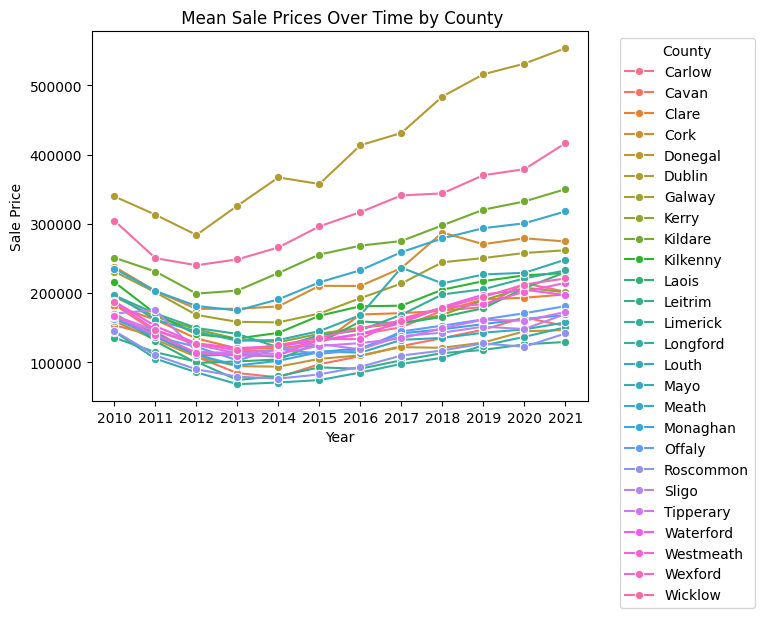

In [20]:
sns.lineplot(data=meanPropertyPrice, x='YEAR', y='SALE PRICE', hue='COUNTY', marker='o')

plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.title(' Mean Sale Prices Over Time by County')
# Set legend outside the plot
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Python Seaborn ine-plot Tutorial
#https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial

##### Step 2: Calculate the median for each individual county

In [21]:
medianPropertyPrice = newPropertyPrice_df.groupby(['COUNTY', 'YEAR'])['SALE PRICE'].median().reset_index()
medianPropertyPrice

#Python median() statistics
#https://www.w3schools.com/python/ref_stat_median.asp#:~:text=median()%20method%20calculates%20the,order%20before%20calculating%20the%20median.

,COUNTY,YEAR,SALE PRICE
0,Carlow,2010,169999.1650
1,Carlow,2011,129950.0000
2,Carlow,2012,100000.0000
3,Carlow,2013,90000.9600
4,Carlow,2014,112000.0000
...,...,...,...
307,Wicklow,2017,299999.9883
308,Wicklow,2018,302000.0000
309,Wicklow,2019,310000.0000
310,Wicklow,2020,327000.0000


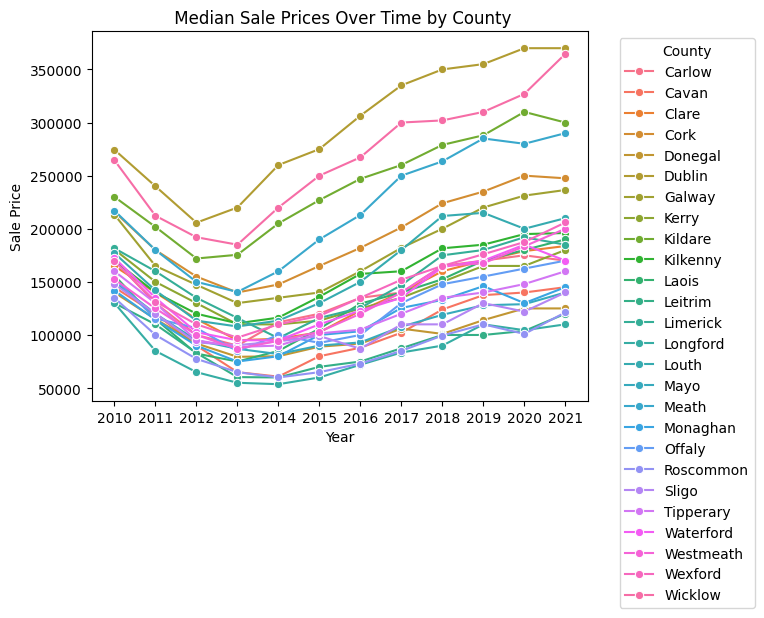

In [22]:
#plt.figure(figsize=(12, 8))
sns.lineplot(data=medianPropertyPrice, x='YEAR', y='SALE PRICE', hue='COUNTY', marker='o')

plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.title(' Median Sale Prices Over Time by County')
# Set legend outside the plot
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Annual Growth Rate

##### Whole Country Growth Rate 

In [51]:
# Group by 'YEAR' and calculate the sum of sale prices
meanAnnualProperty = newPropertyPrice_df.groupby('YEAR')['SALE PRICE'].mean().reset_index()

# Calculate the annual growth rate
meanAnnualProperty['Annual Growth Rate'] = meanAnnualProperty['SALE PRICE'].pct_change() * 100
meanAnnualProperty

#Percentage change code 
#https://www.w3schools.com/python/pandas/ref_df_pct_change.asp#:~:text=The%20pct_change()%20method%20returns,specified%20with%20the%20periods%20parameter.

,YEAR,SALE PRICE,Annual Growth Rate
0,2010,250157.866991,NaN
1,2011,218711.658393,-12.570546
2,2012,196401.334858,-10.200793
3,2013,206674.821116,5.230864
4,2014,217722.901065,5.345634
5,2015,224073.311074,2.916740
6,2016,249754.911779,11.461249
7,2017,272538.735642,9.122473
8,2018,302537.272064,11.007073
9,2019,316998.383389,4.779944


##### Median Overall Growth Rate 

In [24]:
# Group by 'YEAR' and calculate the sum of sale prices
medianAnnualProperty = newPropertyPrice_df.groupby('YEAR')['SALE PRICE'].median().reset_index()

# Calculate the annual growth rate
medianAnnualProperty['Annual Growth Rate'] = medianAnnualProperty['SALE PRICE'].pct_change() * 100
medianAnnualProperty

,YEAR,SALE PRICE,Annual Growth Rate
0,2010,210000.0000,NaN
1,2011,175000.0000,-16.666667
2,2012,150000.0110,-14.285708
3,2013,140000.0000,-6.666674
4,2014,150000.0000,7.142857
5,2015,165000.0000,10.000000
6,2016,185000.0000,12.121212
7,2017,215000.0000,16.216216
8,2018,232000.0000,7.906977
9,2019,242999.9815,4.741371


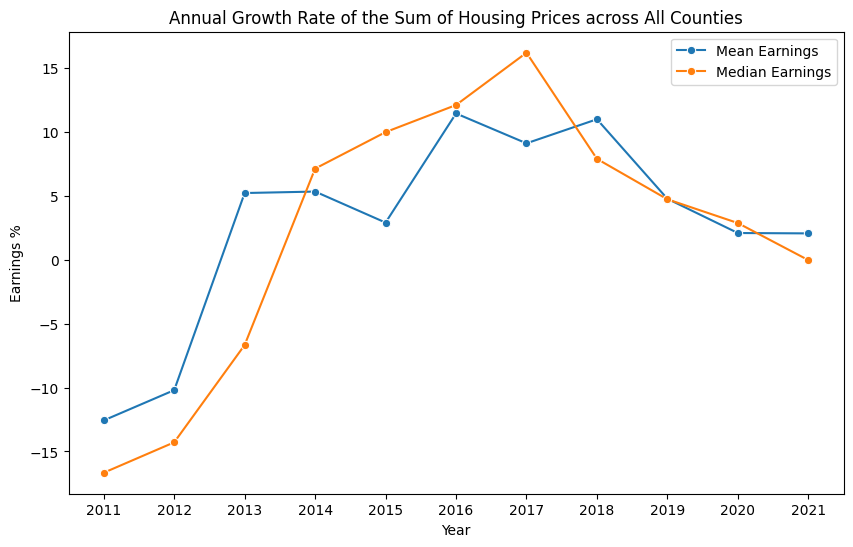

In [25]:
# Create a line plot for both mean and median
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='Annual Growth Rate', data=meanAnnualProperty, marker='o', label='Mean Earnings')
sns.lineplot(x='YEAR', y='Annual Growth Rate', data=medianAnnualProperty, marker='o', label='Median Earnings')

plt.xlabel('Year')
plt.ylabel('Earnings %')
plt.title('Annual Growth Rate of the Sum of Housing Prices across All Counties')
plt.legend()
plt.show()

#### Annual Growth Rate Per County 

In [26]:
meanAnnualProperty_County = newPropertyPrice_df.groupby(['YEAR', 'COUNTY'])['SALE PRICE'].mean().reset_index()# Group by year and county, calculate the mean of the sales price
meanAnnualProperty_County['Annual Growth Rate'] = (meanAnnualProperty_County.groupby('COUNTY')['SALE PRICE'].pct_change() * 100)
meanAnnualProperty_County

,YEAR,COUNTY,SALE PRICE,Annual Growth Rate
0,2010,Carlow,183103.892963,NaN
1,2010,Cavan,153500.596210,NaN
2,2010,Clare,181306.968060,NaN
3,2010,Cork,237735.799022,NaN
4,2010,Donegal,159250.112449,NaN
...,...,...,...,...
307,2021,Tipperary,172489.791144,7.974009
308,2021,Waterford,197004.326026,-3.747504
309,2021,Westmeath,214483.038499,6.264989
310,2021,Wexford,220955.248221,4.166844


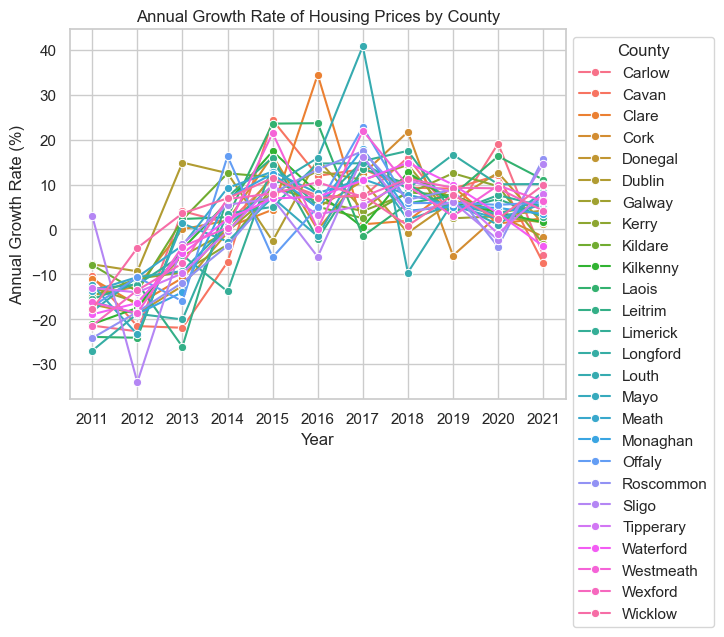

In [52]:
# Create a line plot for annual growth rate by county
#plt.figure(figsize=(14, 8 ))
sns.lineplot(x='YEAR', y='Annual Growth Rate', hue='COUNTY', data=meanAnnualProperty_County, marker='o', errorbar=None)

plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of Housing Prices by County')
plt.legend(title='County', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Data Set 2: Ireland's Population 

Although central tendency measures such as mean, mode & median are commonly used to describe data. For population data, counts or proportions are relevant than central tendency measures.

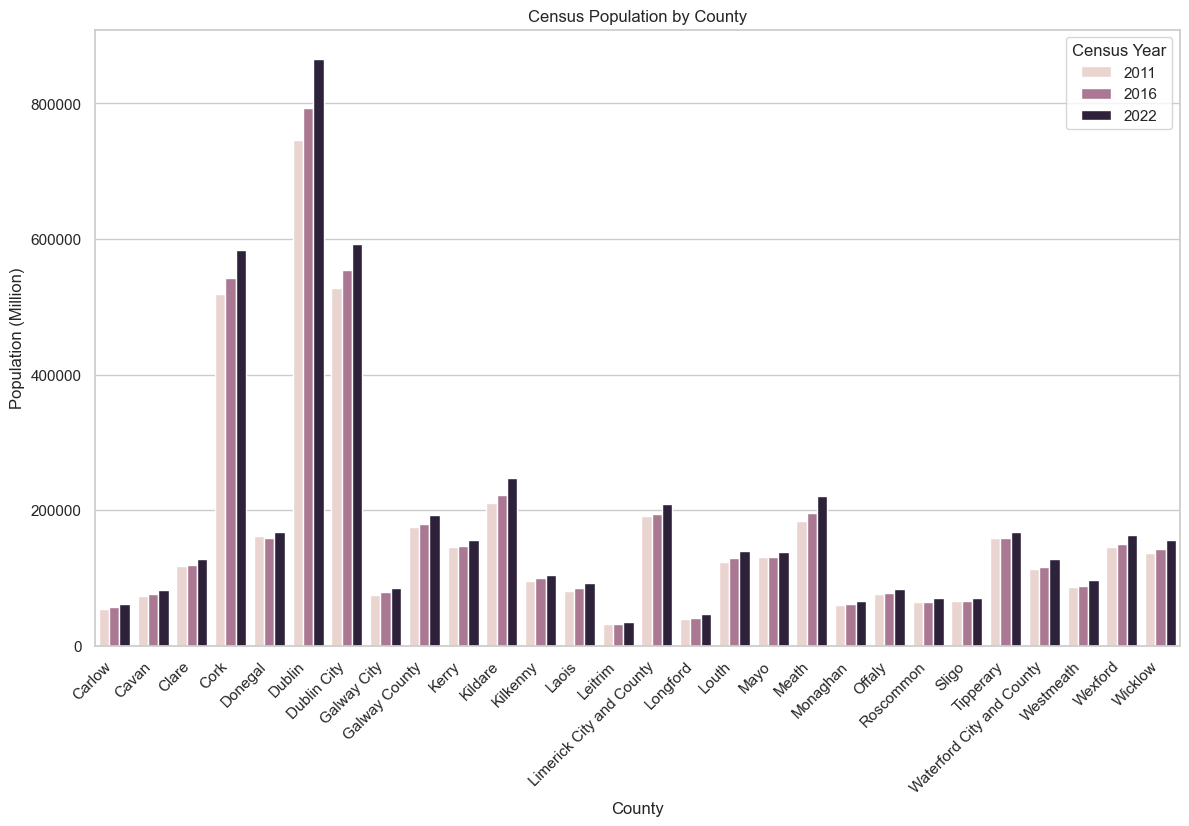

In [30]:
plt.figure(figsize=(14, 8)) #Set the size of the plot 
sns.barplot(x='County', y='VALUE', hue='Census Year', data=newPopulation_df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Population (Million)')
plt.title('Census Population by County')
plt.show()

#Seaborn barplot tutorial
#https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/

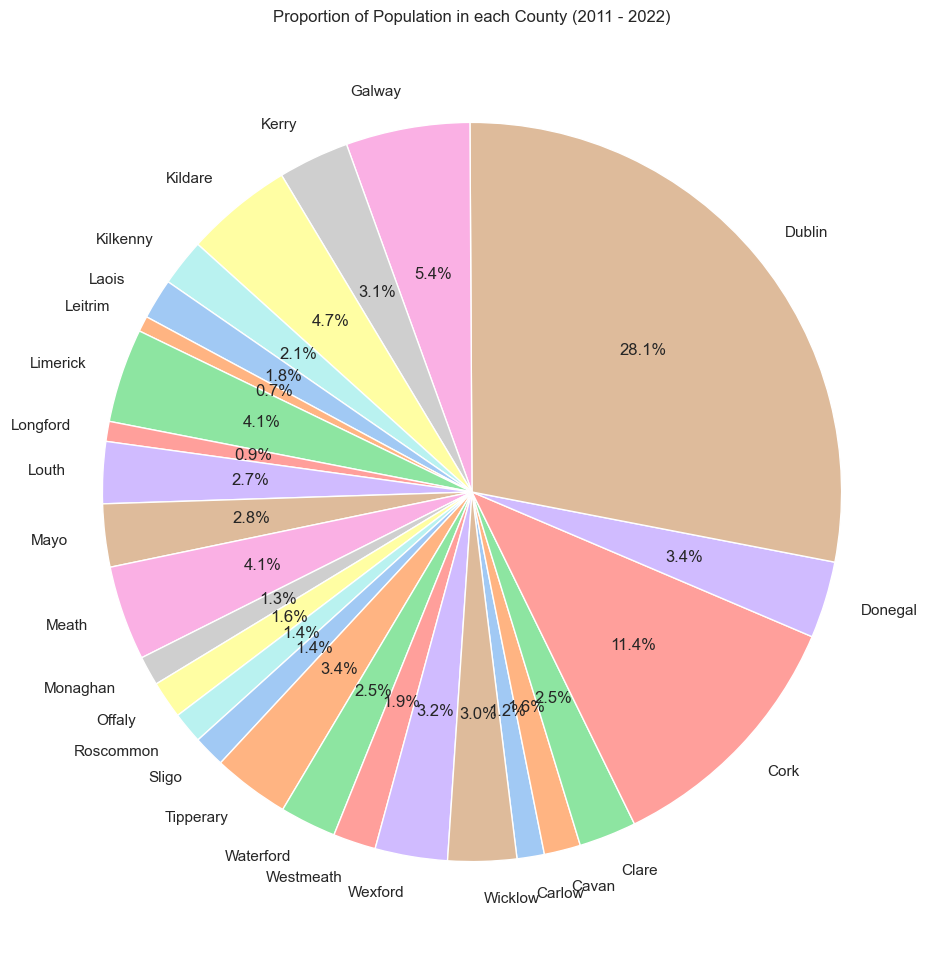

In [67]:
totalPopulation = newPopulation_df.groupby('County')['VALUE'].sum().reset_index()#sum the population by county

#Create piechart with mat plot
plt.figure(figsize=(12, 12)) 
plt.pie(totalPopulation['VALUE'], labels=totalPopulation['County'], autopct='%1.1f%%', startangle=277, colors=sns.color_palette('pastel'))
plt.title('Proportion of Population in each County (2011 - 2022)')
plt.show()

#Matplot pie charts
#https://www.w3schools.com/python/matplotlib_pie_charts.asp

#### Calculate Yearly Growth Rate Per County 

In [32]:
newPopulation_df['Growth Rate'] = newPopulation_df.groupby('County')['VALUE'].pct_change() * 100 #caluclate the percentage difference
newPopulation_df['Growth Rate'].fillna(0, inplace=True) #replace nAn values with 0 

# Exclude the year 2011
filtered_df = newPopulation_df[newPopulation_df['Census Year'] > 2011]

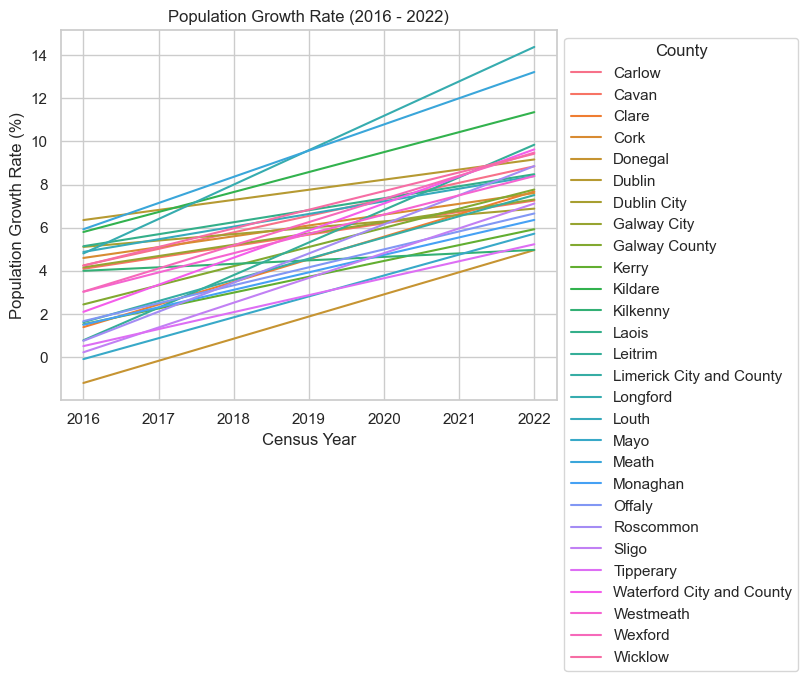

In [33]:
# Create a line plot
sns.lineplot(x='Census Year', y='Growth Rate', hue='County', data=filtered_df) #create lineplot using seaborn

plt.xlabel('Census Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate (2016 - 2022)')
plt.legend(title='County', bbox_to_anchor=(1, 1))
plt.show()


##  Dataset 3: Household income

#### Descriptive Statistics 

Overall Annual Income 

In [34]:
meanAnnualEarnings = income_df[(income_df['Statistic Label'] == 'Mean Annual Earnings')]#new dataframe of just the mean 

# Group by 'Year' and calculate the mean for each year
overallMeanEarnings = meanAnnualEarnings.groupby('Year')['VALUE'].mean().reset_index()
overallMeanEarnings

,Year,VALUE
0,2011,36677.730769
1,2012,36489.461538
2,2013,36682.076923
3,2014,36957.653846
4,2015,37526.730769
5,2016,37570.192308
6,2017,38405.000000
7,2018,39666.884615
8,2019,41044.230769
9,2020,45251.461538


In [35]:
medianAnnualEarnings = income_df[(income_df['Statistic Label'] == 'Median Annual Earnings')]#new dataframe of just the median 

# Group by 'Year' and calculate the mean for each year
overallMedianEarnings = medianAnnualEarnings.groupby('Year')['VALUE'].mean().reset_index()
overallMedianEarnings

,Year,VALUE
0,2011,31660.153846
1,2012,31385.384615
2,2013,31565.346154
3,2014,31840.153846
4,2015,32152.769231
5,2016,32110.192308
6,2017,32728.730769
7,2018,33787.384615
8,2019,34902.653846
9,2020,38540.846154


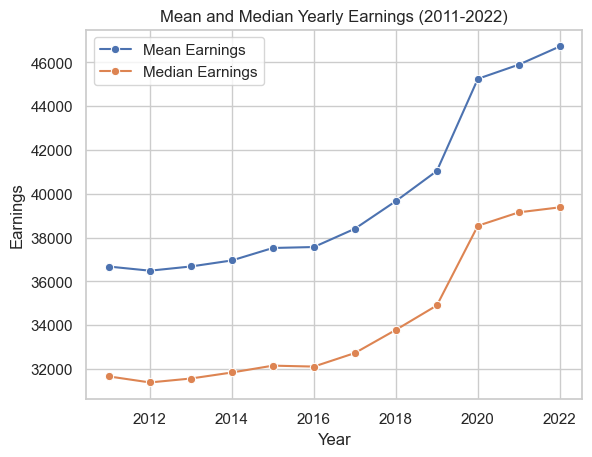

In [36]:
# Create a line plot for both mean and median
sns.lineplot(x='Year', y='VALUE', data=overallMeanEarnings, marker='o', label='Mean Earnings')
sns.lineplot(x='Year', y='VALUE', data=overallMedianEarnings, marker='o', label='Median Earnings')

plt.xlabel('Year')
plt.ylabel('Earnings')
plt.title('Mean and Median Yearly Earnings (2011-2022)')
plt.legend()
plt.show()


Annual Income By County

In [37]:
meanAnnualIncome_Counties = income_df[(income_df['Statistic Label'] == 'Mean Annual Earnings')]#Get the mean and store in a new dataframe
meanAnnualIncome_Counties

,Statistic Label,Year,County,VALUE
3,Mean Annual Earnings,2011,Carlow,34815
6,Mean Annual Earnings,2011,Dublin,44243
9,Mean Annual Earnings,2011,Kildare,42084
12,Mean Annual Earnings,2011,Kilkenny,36856
15,Mean Annual Earnings,2011,Laois,37253
...,...,...,...,...
957,Mean Annual Earnings,2022,Roscommon,44833
960,Mean Annual Earnings,2022,Sligo,45599
963,Mean Annual Earnings,2022,Cavan,43183
966,Mean Annual Earnings,2022,Donegal,39156


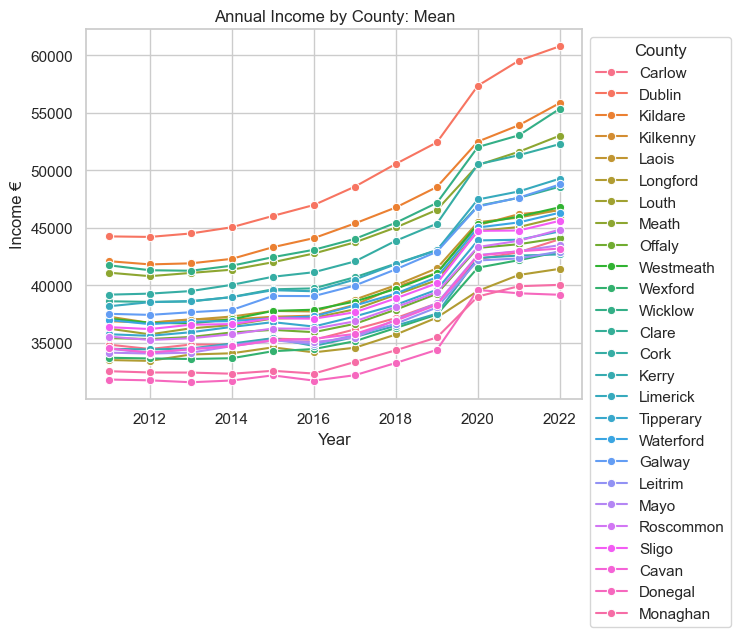

In [38]:
sns.lineplot(x='Year', y='VALUE', hue='County', data=meanAnnualIncome_Counties, marker='o', errorbar=None)#line plot for every county using mean

plt.xlabel('Year')
plt.ylabel('Income €')
plt.title('Annual Income by County: Mean')
plt.legend(title='County', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [39]:
medianAnnualIncome_Counties = income_df[(income_df['Statistic Label'] == 'Median Annual Earnings')]#store median earnings in a new data frame 
medianAnnualIncome_Counties

,Statistic Label,Year,County,VALUE
975,Median Annual Earnings,2011,Carlow,30528
978,Median Annual Earnings,2011,Dublin,35825
981,Median Annual Earnings,2011,Kildare,35733
984,Median Annual Earnings,2011,Kilkenny,32016
987,Median Annual Earnings,2011,Laois,33532
...,...,...,...,...
1929,Median Annual Earnings,2022,Roscommon,39048
1932,Median Annual Earnings,2022,Sligo,39443
1935,Median Annual Earnings,2022,Cavan,37224
1938,Median Annual Earnings,2022,Donegal,33523


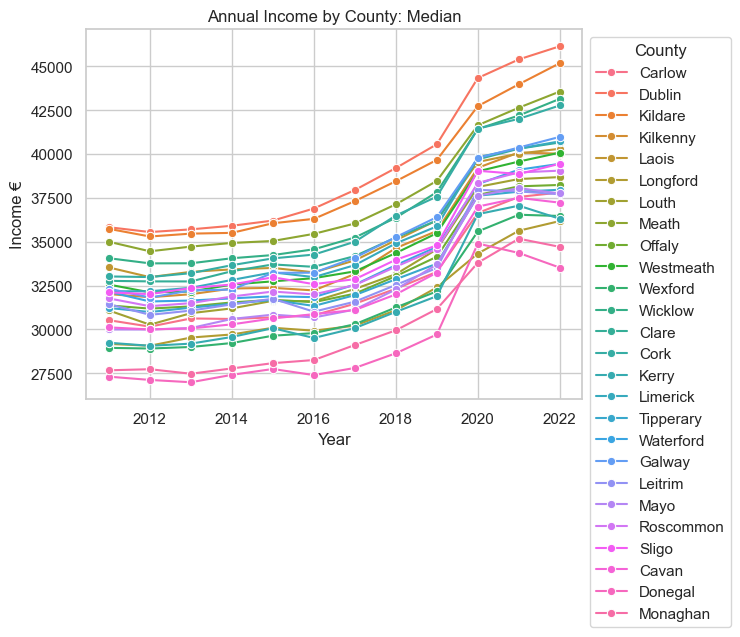

In [40]:
sns.lineplot(x='Year', y='VALUE', hue='County', data=medianAnnualIncome_Counties, marker='o', errorbar=None)#lineplot for every county using median

plt.xlabel('Year')
plt.ylabel('Income €')
plt.title('Annual Income by County: Median')
plt.legend(title='County', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

##### Annual Income Growth Rate

In [41]:
meanAnnualIncome = income_df[(income_df['Statistic Label'] == 'Mean Annual Earnings')].copy()#create an exact copy where it is a mean value 
meanAnnualIncome['Mean Annual Growth Rate'] = meanAnnualIncome.groupby('County')['VALUE'].pct_change() * 100 #calculate percentage change over time 
meanAnnualIncome

,Statistic Label,Year,County,VALUE,Mean Annual Growth Rate
3,Mean Annual Earnings,2011,Carlow,34815,NaN
6,Mean Annual Earnings,2011,Dublin,44243,NaN
9,Mean Annual Earnings,2011,Kildare,42084,NaN
12,Mean Annual Earnings,2011,Kilkenny,36856,NaN
15,Mean Annual Earnings,2011,Laois,37253,NaN
...,...,...,...,...,...
957,Mean Annual Earnings,2022,Roscommon,44833,2.223084
960,Mean Annual Earnings,2022,Sligo,45599,1.883546
963,Mean Annual Earnings,2022,Cavan,43183,0.561222
966,Mean Annual Earnings,2022,Donegal,39156,-0.335980


Calculate the Mean Annual Growth Rate

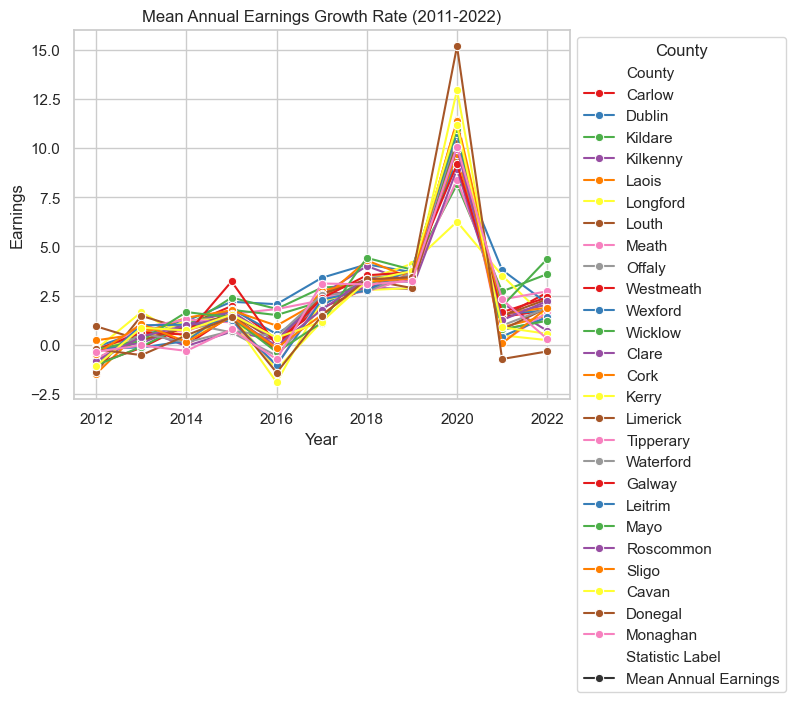

In [42]:

# Create line plots for mean and median
sns.lineplot(x='Year', y='Mean Annual Growth Rate', hue='County', style='Statistic Label', data=meanAnnualIncome, marker='o', palette='Set1')

plt.xlabel('Year')
plt.ylabel('Earnings')
plt.title('Mean Annual Earnings Growth Rate (2011-2022)')
plt.legend(title='County',bbox_to_anchor=(1, 1))
plt.show()

Calculate the Median Annual Growth rate

In [43]:
medianAnnualIncome = income_df[(income_df['Statistic Label'] == 'Median Annual Earnings')].copy()
medianAnnualIncome['Mean Annual Growth Rate'] = medianAnnualIncome.groupby('County')['VALUE'].pct_change() * 100
medianAnnualIncome

,Statistic Label,Year,County,VALUE,Mean Annual Growth Rate
975,Median Annual Earnings,2011,Carlow,30528,NaN
978,Median Annual Earnings,2011,Dublin,35825,NaN
981,Median Annual Earnings,2011,Kildare,35733,NaN
984,Median Annual Earnings,2011,Kilkenny,32016,NaN
987,Median Annual Earnings,2011,Laois,33532,NaN
...,...,...,...,...,...
1929,Median Annual Earnings,2022,Roscommon,39048,0.256753
1932,Median Annual Earnings,2022,Sligo,39443,1.510706
1935,Median Annual Earnings,2022,Cavan,37224,-0.728058
1938,Median Annual Earnings,2022,Donegal,33523,-2.433133


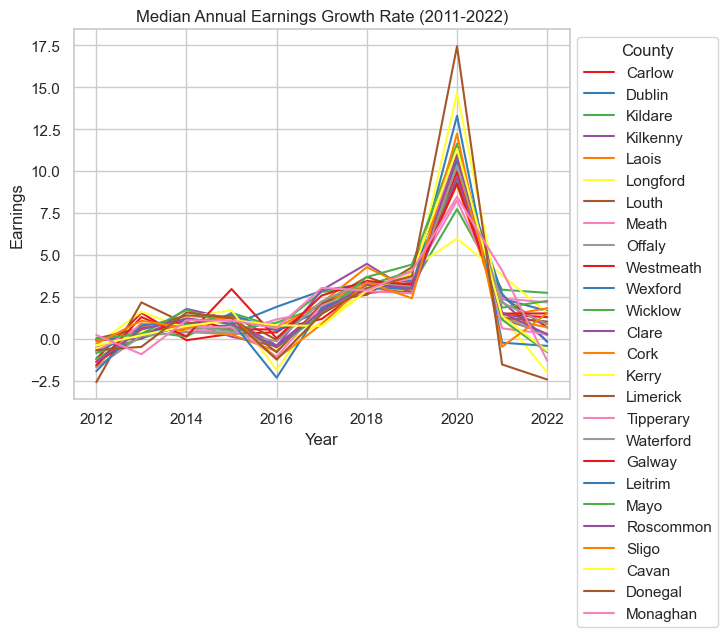

In [44]:
sns.lineplot(x='Year', y='Mean Annual Growth Rate', hue='County', data=medianAnnualIncome, palette='Set1')

plt.xlabel('Year')
plt.ylabel('Earnings')
plt.title('Median Annual Earnings Growth Rate (2011-2022)')
plt.legend(title='County',bbox_to_anchor=(1, 1))
plt.show()

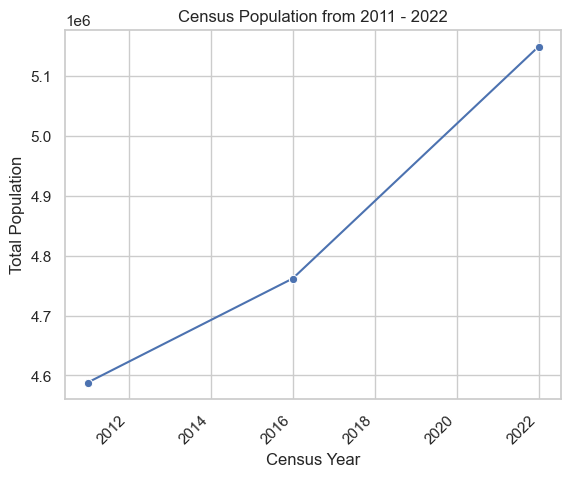

In [45]:
total_population = newPopulation_df.groupby('Census Year')['VALUE'].sum().reset_index()

# Create a line plot for total population
sns.lineplot(x='Census Year', y='VALUE', data=total_population, marker='o')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Total Population')
plt.title('Census Population from 2011 - 2022')

plt.show()


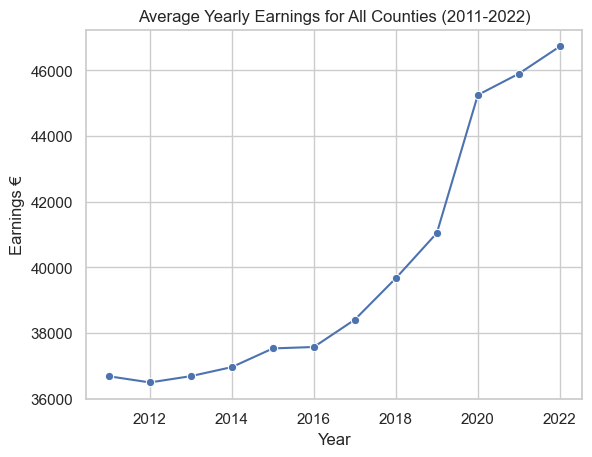

In [46]:

averageIncome = income_df[(income_df['Statistic Label'] == 'Mean Annual Earnings')]

# Create line plot for mean earnings
sns.lineplot(x = 'Year', y = 'VALUE', data = averageIncome, marker = 'o', errorbar = None)

plt.xlabel('Year')
plt.ylabel('Earnings €')
plt.title('Average Yearly Earnings for All Counties (2011-2022)')
plt.show()
